<a href="https://colab.research.google.com/github/NolanRink/CS4540/blob/main/HW5Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/main/stats/Maximum_Likelihood_Estimation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
- More samples reduce random errors and help the data better reflect the true distribution. This makes the likelihood curve steeper near the true values, leading to more accurate estimates of the parameters.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
- Extremely Off: The optimizer may take longer to find the best values and might even get stuck in a wrong spot, especially with little data          
Extremely Close: The process speeds up because the starting point is near the true values, reducing the effort needed to reach the best estimates.
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?
- The gaussian function first unpacks the parameter estimates from the input array by setting mean and std from params. It then calculates the log likelihood of each data point using stats.norm.logpdf(data, mean, std), which computes the logarithm of the probability density function for a normal distribution—this transformation is crucial for numerical stability and to convert products of probabilities into sums. Finally, by summing these log likelihoods and returning their negative value, the function produces the negative log likelihood, which is minimized during optimization to yield the maximum likelihood estimates for the mean and standard deviation.

In [1]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100000
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 0.016 std*  = 2.995
mean   = 0.000 std   = 3.000


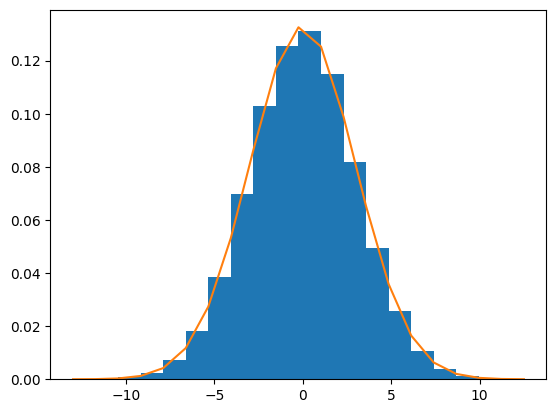

In [2]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()

In [3]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)

samples = 1000
mu_logistic = 2
sigma_logistic  = 1

logistic_data = np.random.logistic(loc=mu_logistic, scale=sigma_logistic, size=samples)



In [4]:
def logistic_neg_log_likelihood(params, data):
    mu, sigma = params
    # Avoid division by zero or negative scale
    if sigma <= 0:
        return np.inf

    # Compute the logistic PDF values
    exp_term = np.exp(-(data - mu) / sigma)
    pdf = exp_term / (sigma * (1 + exp_term)**2)

    # Return the negative log likelihood
    return -np.sum(np.log(pdf))

# Initial parameter guesses; these can be tweaked
init_params = [0.0, 1.0]

# Use the minimize function to estimate the parameters
result = minimize(logistic_neg_log_likelihood, init_params, args=(logistic_data,))
estimated_mu, estimated_sigma = result.x

print('mean*  = {:.3f} std*  = {:.3f}'.format(result.x[0],result.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu_logistic, sigma_logistic))

mean*  = 2.004 std*  = 1.005
mean   = 2.000 std   = 1.000
